In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lls import LinearLeastSquare
from sklearn.model_selection import train_test_split
from io import StringIO

In [2]:
data=pd.read_csv("input/HousePrice.csv")

data.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [3]:
data = data[data['Area'].apply(lambda x: x.isnumeric())]
data.drop_duplicates(inplace=True)
data.dropna(inplace=True)
data.reset_index(drop = True, inplace = True)

### update dollar price to july 2023

In [4]:
data['Price(USD)'] = data['Price'] / 480000

data.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,3854.166667
1,60,1,True,True,True,Shahran,1.850000e+09,3854.166667
2,79,2,True,True,True,Pardis,5.500000e+08,1145.833333
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,1880.208333
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,14583.333333


### 5 most expensive houses

In [22]:
data_expensive = data.sort_values(by=['Price'], ascending=False)

data_expensive.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
1606,420,4,0,0,0,Zaferanieh,9.240000e+10,192500.000000
1704,705,5,0,0,1,Abazar,9.100000e+10,189583.333333
405,400,5,0,0,1,Lavasan,8.500000e+10,177083.333333
770,680,5,0,0,1,Ekhtiarieh,8.160000e+10,170000.000000
1249,350,4,0,0,0,Niavaran,8.050000e+10,167708.333333


5 most expensive houses
| row          | address     | Price     | 
| :---         | :----  | :---- | 
| 1  | Zaferanieh  | 	9.240000e+10  | 
| 2  | Abazar  | 	9.100000e+10  | 
| 3  | Lavasan  | 	8.500000e+10  | 
| 4  | Ekhtiarieh  | 	8.160000e+10  | 
| 5  | Niavaran  | 		8.050000e+10  | 

### Use all possible features for X_train

In [6]:
data['Parking']=data['Parking'].replace([True,False],[0,1])
data['Warehouse']=data['Warehouse'].replace([True,False],[0,1])
data['Elevator']=data['Elevator'].replace([True,False],[0,1])
# data.drop('Address',axis=1,inplace=True)
X = data[['Area', 'Room', 'Parking', 'Warehouse', 'Elevator']].to_numpy().astype(int)
Y = data[['Price']].to_numpy().astype(int)

In [7]:
data['Area'] = pd.to_numeric(data['Area'])
data['Area']

0        63
1        60
2        79
3        95
4       123
       ... 
3237     63
3238     86
3239     83
3240    105
3241     82
Name: Area, Length: 3242, dtype: int64

In [8]:
data.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,0,0,0,Shahran,1.850000e+09,3854.166667
1,60,1,0,0,0,Shahran,1.850000e+09,3854.166667
2,79,2,0,0,0,Pardis,5.500000e+08,1145.833333
3,95,2,0,0,0,Shahrake Qods,9.025000e+08,1880.208333
4,123,2,0,0,0,Shahrake Gharb,7.000000e+09,14583.333333


### Split dataset

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, shuffle=True, test_size=0.2)

### Fit the LLS model on training dataset

In [10]:
X_train

array([[130,   3,   0,   0,   0],
       [ 63,   1,   0,   0,   0],
       [ 59,   1,   0,   0,   1],
       ...,
       [ 84,   3,   0,   0,   0],
       [ 80,   2,   0,   0,   0],
       [ 48,   1,   1,   0,   1]])

In [11]:
lls= LinearLeastSquare()
lls.fit(X_train,Y_train)

array([[-3.46212695e+06],
       [-4.06737904e+08],
       [ 8.80250653e+08],
       [ 1.74947723e+08],
       [ 7.48405373e+08]])

### Evaluate model on test dataset

In [12]:
Y_pred = lls.predict(X_test)
print('Evaluate MAE:', lls.evaluate(Y_test, Y_pred, 'mae'))
print('Evaluate MSE:', lls.evaluate(Y_test, Y_pred, 'mse'))
print('Evaluate RMAE:', lls.evaluate(Y_test, Y_pred, 'rmse'))

Evaluate MAE: 1188244052.9573762
Evaluate MSE: 2.0002627271778045e+18
Evaluate RMAE: 1414306447.4072812


Why the MSE metric is a very large number?

* Because Y numbers are very large and reach the power of two.

### Compare result with Scikit-Learn's results

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV 
import sklearn.metrics as metrics

In [16]:
lls= LinearRegression()
lls.fit(X_train,Y_train)

LinearRegression()

In [19]:
Y_pred = lls.predict(X_test)
print('Evaluate MAE:', metrics.mean_absolute_error(Y_pred, Y_test))
print('Evaluate MSE:', metrics.mean_squared_error(Y_pred, Y_test))
print('Evaluate RMAE:', np.sqrt(metrics.mean_squared_error(Y_pred, Y_test)))

Evaluate MAE: 1191334095.1729167
Evaluate MSE: 2.0044587319183887e+18
Evaluate RMAE: 1415789084.545572


In [20]:
lls= RidgeCV()
lls.fit(X_train,Y_train)

RidgeCV()

In [21]:
Y_pred = lls.predict(X_test)
print('Evaluate MAE:', metrics.mean_absolute_error(Y_pred, Y_test))
print('Evaluate MSE:', metrics.mean_squared_error(Y_pred, Y_test))
print('Evaluate RMAE:', np.sqrt(metrics.mean_squared_error(Y_pred, Y_test)))

Evaluate MAE: 1193205134.5680337
Evaluate MSE: 2.0037948472811318e+18
Evaluate RMAE: 1415554607.6648304


Tehran House Price
| Models          | MAE    | MSE     | RMAE     |
| :---            | :----  | :---- | :---- |
| my LLS results  | 1188244052  | 2.00026e+18  | 1414306447  |
| sklearn results | 1191334095  | 2.00445e+18  | 1415789084  |
| RidgeCV results | 1193205134  | 2.00379e+18  | 1415554607  |

In [14]:
data.corr()

C:\Users\moham\AppData\Local\Temp\ipykernel_23108\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Area,Room,Parking,Warehouse,Elevator,Price,Price(USD)
Area,1.000000,0.670121,-0.200009,-0.072364,-0.047034,0.720935,0.720935
Room,0.670121,1.000000,-0.278743,-0.125894,-0.181826,0.569738,0.569738
Parking,-0.200009,-0.278743,1.000000,0.429241,0.428801,-0.193761,-0.193761
Warehouse,-0.072364,-0.125894,0.429241,1.000000,0.205098,-0.109370,-0.109370
Elevator,-0.047034,-0.181826,0.428801,0.205098,1.000000,-0.110310,-0.110310
Price,0.720935,0.569738,-0.193761,-0.109370,-0.110310,1.000000,1.000000
Price(USD),0.720935,0.569738,-0.193761,-0.109370,-0.110310,1.000000,1.000000


In [ ]:
data['Parking']=data['Parking'].replace(["True","False"],[0,1])
data['Warehouse']=data['Warehouse'].replace(["True","False"],[0,1])
data['Elevator']=data['Elevator'].replace(["True","False"],[0,1])
data.head()

0        True
1        True
2        True
3        True
4        True
        ...  
3473    False
3474     True
3475     True
3477     True
3478     True
Name: Elevator, Length: 3271, dtype: bool

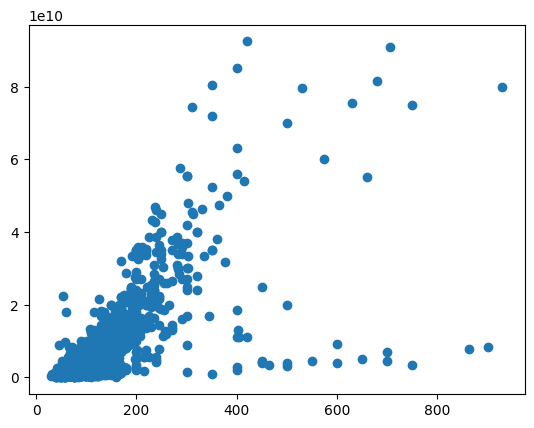

In [ ]:
plt.scatter(data['Area'],data['Price'])
plt.show()

# LLS

In [ ]:
X_train=np.array(data[['Area']])
Y_train=np.array(data[['Price']])

print(X_train.shape)
print(Y_train.shape)

(3473, 1)
(3473, 1)


In [ ]:
# X_train=X_train.reshape(-1,1)


In [ ]:
from sklearn.model_selection import train_test_split
from numpy.linalg import inv

X_train, X_test,Y_train, Y_test=train_test_split(X_train,Y_train,test_size=0.2)
print(X_train.shape)
print(Y_train.shape)

(2222, 1)
(2222, 1)


In [ ]:
# W= (X_train.T*X_train)^-1*X.T*Y

# w=np.matmul(np.matmul(np.linalg.inv(np.matmul(X_train.T,X_train)),X_train.T),Y_train)
#   ravesh digar

w=inv(X_train.T @ X_train)@ X_train.T @Y_train


w


array([[60663782.88354232]])

In [ ]:
Y_pred= X_test@ w

In [ ]:
lls= LinearLeastSquare()
lls.fit(X_train,Y_train)

Y_predd=lls.predict(X_test)

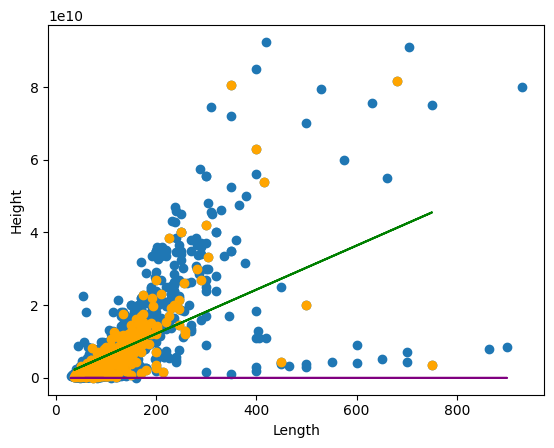

In [ ]:
plt.scatter(data['Area'],data['Price'])
plt.scatter(X_test,Y_test,color='orange')
# plt.plot(X_train,w*X_train,color='red')
plt.plot(X_test,Y_predd,color='green')
plt.plot(X_train,0.87*X_train,color='purple')
plt.xlabel('Length')
plt.ylabel('Height')
plt.show()

In [ ]:
loss = lls.evaluate(Y_test,Y_predd,'mae')
loss

3228696726.2794657

In [ ]:
new_length= 0.49
x=new_length

y_pred= w* x

height=y_pred

print(height)

[[0.13085352]]


In [ ]:
#classification

# dar classification bayad daghighan pred va test yeksan bashand ta accuracy balatar ravad

Y_test= np.array([2,3,4,5,3,1])
Y_pred= np.array([2,1,4,4,5,1])

accuray= np.sum(Y_test==Y_pred)/len(Y_test)
accuray

0.5

In [ ]:
# regression

Y_test= np.array([210,330,400,500,300,199])
Y_pred= np.array([200,300,440,500,300,200])

accuray= np.sum(Y_test==Y_pred)/len(Y_test)
accuray

# loss   خطا
#mean abs loss    or  mean abs error(MAE)      in pytorch called L1LOSS
mae=np.sum(np.abs(Y_test-Y_pred))/len(Y_test)

print(mae)

mse=np.sum((Y_test-Y_pred)**2)/len(Y_test)
print(mse)

13.5
433.5
